In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [85]:
dataset = pd.read_csv('ICICI_BANK.csv')

In [86]:
dataset.shape

(5306, 15)

In [87]:
dataset.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4789 non-null   float64
 14  %Deliverble         4789 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [89]:
dataset.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.789000e+03,4789.000000
mean,550.895392,551.558538,560.558556,541.534197,551.050980,550.995524,551.129031,8.224631e+06,3.759299e+14,138367.627443,4.183406e+06,0.473463
std,368.784064,368.890953,374.079697,363.389664,368.705647,368.725374,368.746905,1.218535e+07,4.758133e+14,99008.729009,6.365382e+06,0.131495
min,67.400000,67.000000,70.450000,66.000000,67.000000,67.400000,68.520000,7.409000e+03,9.617283e+10,2595.000000,1.501500e+04,0.099000
25%,267.562500,267.400000,271.912500,263.625000,267.400000,267.612500,267.577500,9.612055e+05,3.459442e+13,79312.250000,6.995020e+05,0.384300
50%,398.075000,399.000000,406.525000,392.450000,398.700000,398.175000,398.235000,3.486648e+06,2.923010e+14,110101.000000,1.963117e+06,0.476400
75%,873.562500,877.000000,888.775000,859.800000,874.600000,873.562500,873.510000,1.157202e+07,4.993528e+14,162953.500000,5.948817e+06,0.564100
max,1794.100000,1767.050000,1798.150000,1760.150000,1793.000000,1794.100000,1783.460000,2.868577e+08,1.460000e+16,949891.000000,2.325307e+08,0.983000


In [90]:
display(dataset.head().style.hide_index())

Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
03-01-2000,ICICIBANK,EQ,69.200000,74.350000,74.750000,71.400000,74.750000,74.750000,73.200000,286260,2095440000000.000000,nan,nan,nan
04-01-2000,ICICIBANK,EQ,74.750000,73.050000,78.500000,71.000000,73.250000,73.050000,73.380000,296264,2173890000000.000000,nan,nan,nan
05-01-2000,ICICIBANK,EQ,73.050000,70.000000,73.500000,67.500000,70.000000,69.500000,70.850000,227624,1612790000000.000000,nan,nan,nan
06-01-2000,ICICIBANK,EQ,69.500000,71.000000,74.000000,69.550000,69.750000,70.050000,72.040000,275149,1982120000000.000000,nan,nan,nan
07-01-2000,ICICIBANK,EQ,70.050000,69.000000,72.500000,66.000000,67.000000,67.400000,68.720000,138809,953888000000.000000,nan,nan,nan


In [91]:

dataset.drop(dataset.columns.difference(['Date', 'Open', 'Close']), 1, inplace=True)

In [92]:
display(dataset.head().style.hide_index())

Date,Open,Close
03-01-2000,74.350000,74.750000
04-01-2000,73.050000,73.050000
05-01-2000,70.000000,69.500000
06-01-2000,71.000000,70.050000
07-01-2000,69.000000,67.400000


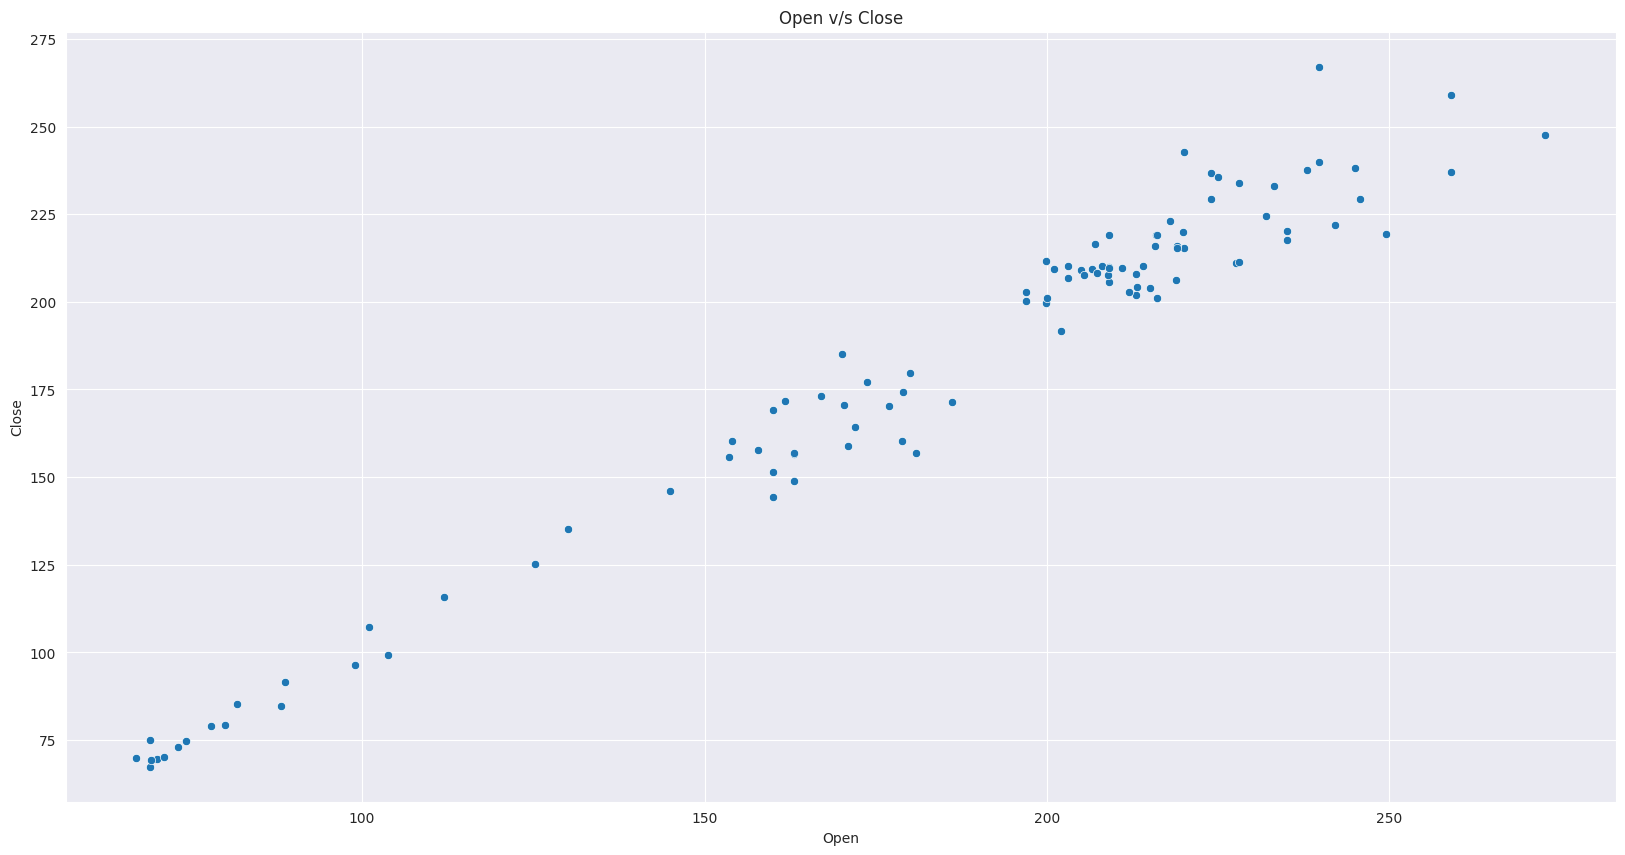

In [93]:
fig, ax = plt.subplots(figsize=(20, 10))
plot1 = sns.scatterplot(data=dataset.head(100), x="Open", y="Close", ax=ax)
plot1.set(title='Open v/s Close')
plt.show()

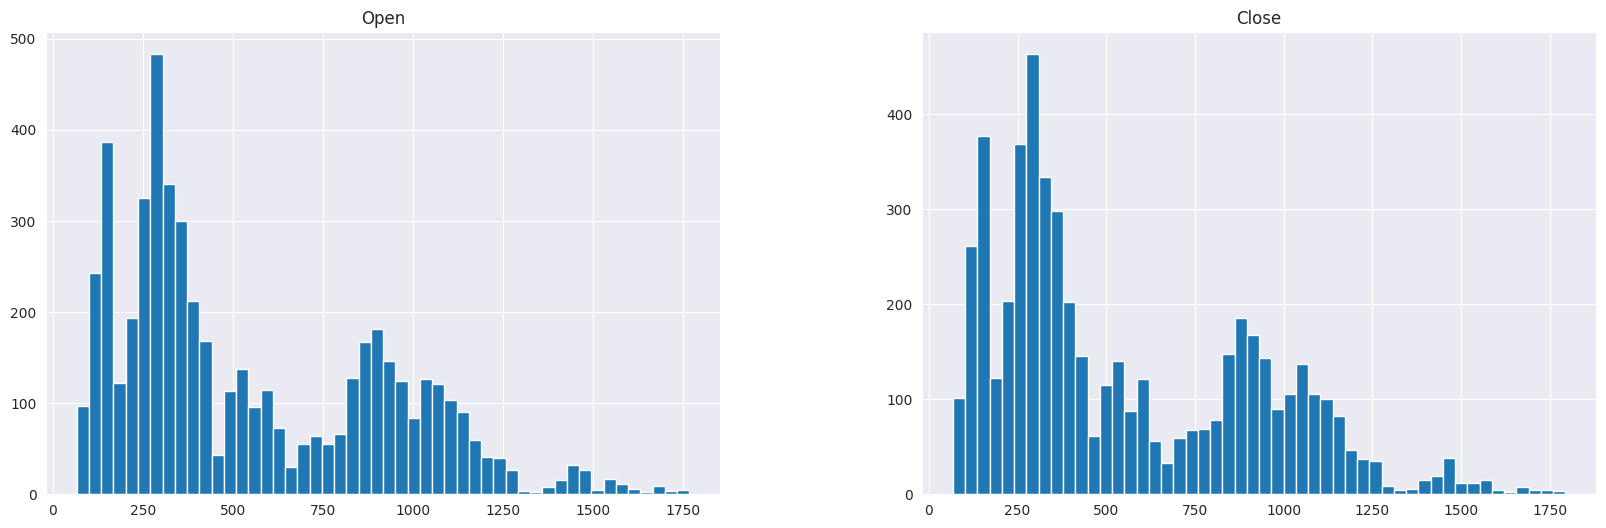

In [94]:
dataset.hist(bins=50, figsize=(20, 6))
plt.show()

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [96]:
X = dataset['Open'].values
y = dataset['Close'].values

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [98]:
model1 = LinearRegression()
build1 = model1.fit(X_train.reshape(-1, 1), y_train)
predict1 = model1.predict(X_test.reshape(-1, 1))

In [99]:
print("Co-efficient: ", model1.coef_)
print("\nIntercept: ", model1.intercept_)

Co-efficient:  [0.99922242]

Intercept:  0.07097273354827394


In [100]:
df1 = pd.DataFrame(list(zip(y_test, predict1)), columns=["Actual Values", "Predicted Values"])

In [101]:
df1.head().style.hide_index()

Actual Values,Predicted Values
1685.550000,1659.779413
1017.450000,1011.383984
157.800000,157.748271
85.350000,81.807367
425.350000,432.734281


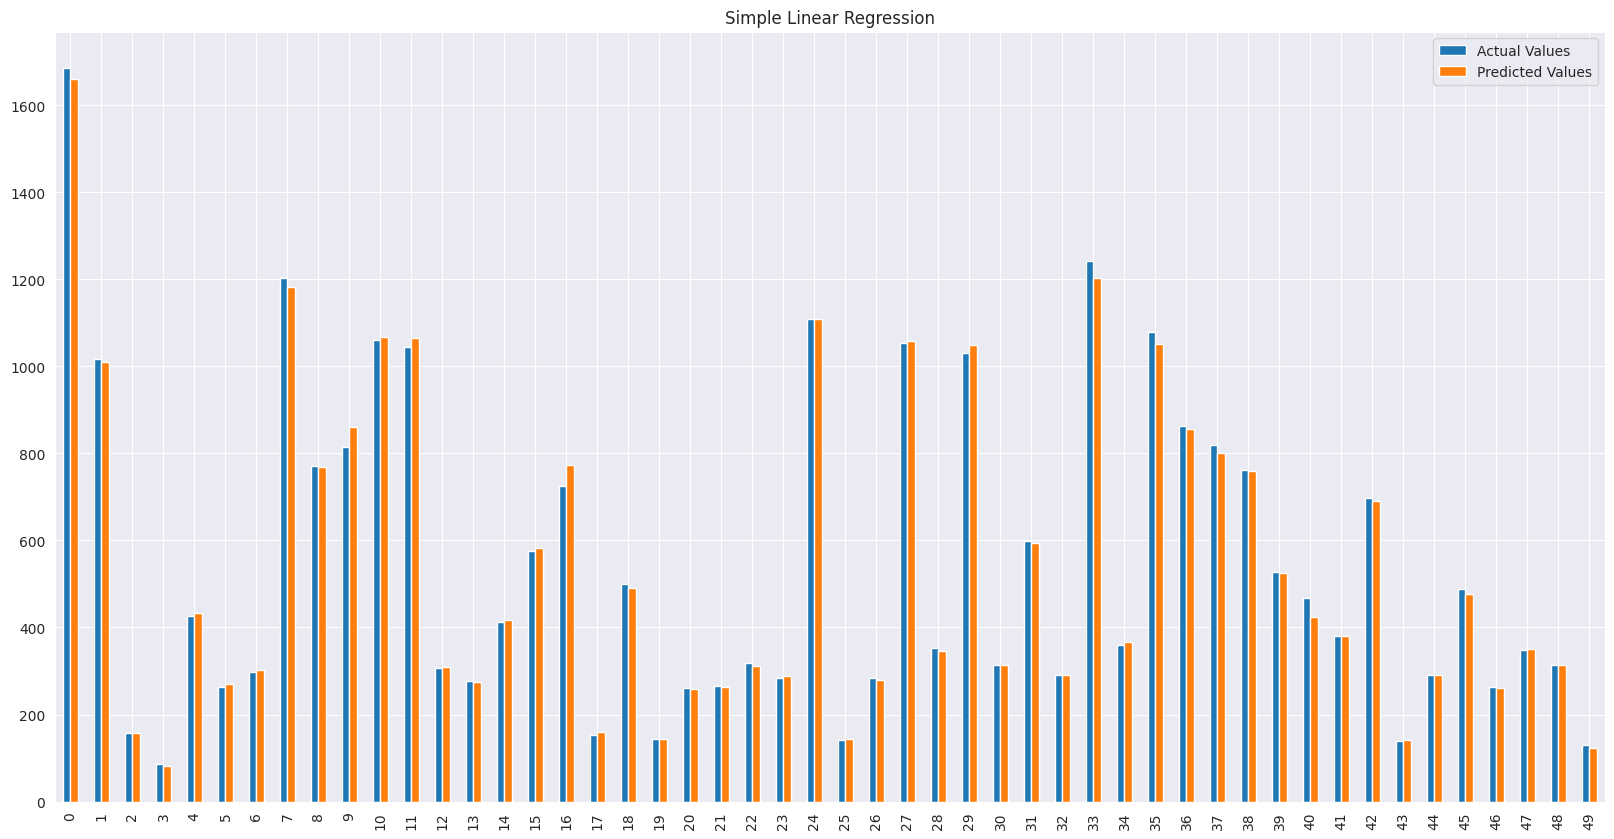

In [102]:
df1.head(50).plot(kind="bar", figsize=(20, 10), title='Simple Linear Regression')
plt.show()

In [103]:
accuracy1 = r2_score(y_test, predict1)
print("Accuracy of Simple Linear Regression:", accuracy1)

Accuracy of Simple Linear Regression: 0.9984212860073358


In [104]:
model2 = SVR(kernel="rbf", gamma = 0.01, C=100)
build2 = model2.fit(X_train.reshape(-1, 1), y_train)
predict2 = model2.predict(X_test.reshape(-1, 1))

In [105]:
df2 = pd.DataFrame(list(zip(y_test, predict2)), columns=["Actual Values", "Predicted Values"])

In [106]:
df2.head().style.hide_index()

Actual Values,Predicted Values
1685.550000,801.170394
1017.450000,1021.159678
157.800000,158.364337
85.350000,82.764843
425.350000,431.953792


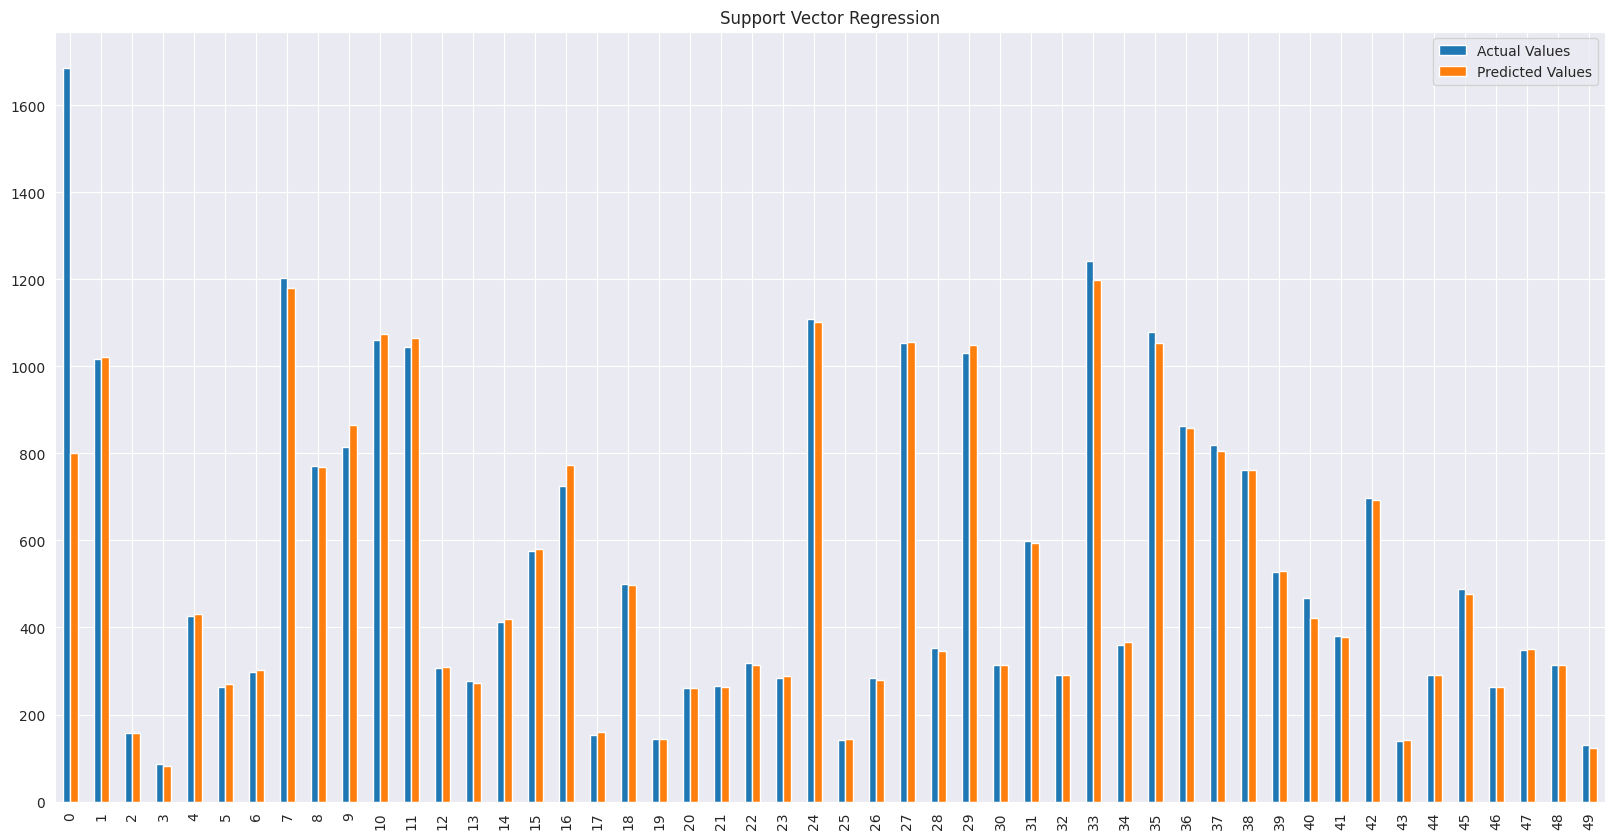

In [107]:
df2.head(50).plot(kind="bar", figsize=(20, 10), title='Support Vector Regression')
plt.show()

In [108]:
accuracy2 = r2_score(y_test, predict2)
print("Accuracy of Support Vector Regression:", accuracy2)

Accuracy of Support Vector Regression: 0.9599720432045787


In [109]:
model3 = DecisionTreeRegressor()
build3 = model3.fit(X_train.reshape(-1, 1), y_train)
predict3 = model3.predict(X_test.reshape(-1, 1))

In [110]:
df3 = pd.DataFrame(list(zip(y_test, predict3)), columns=["Actual Values", "Predicted Values"])

In [111]:
df3.head().style.hide_index()

Actual Values,Predicted Values
1685.550000,1684.700000
1017.450000,1031.775000
157.800000,161.250000
85.350000,75.150000
425.350000,431.375000


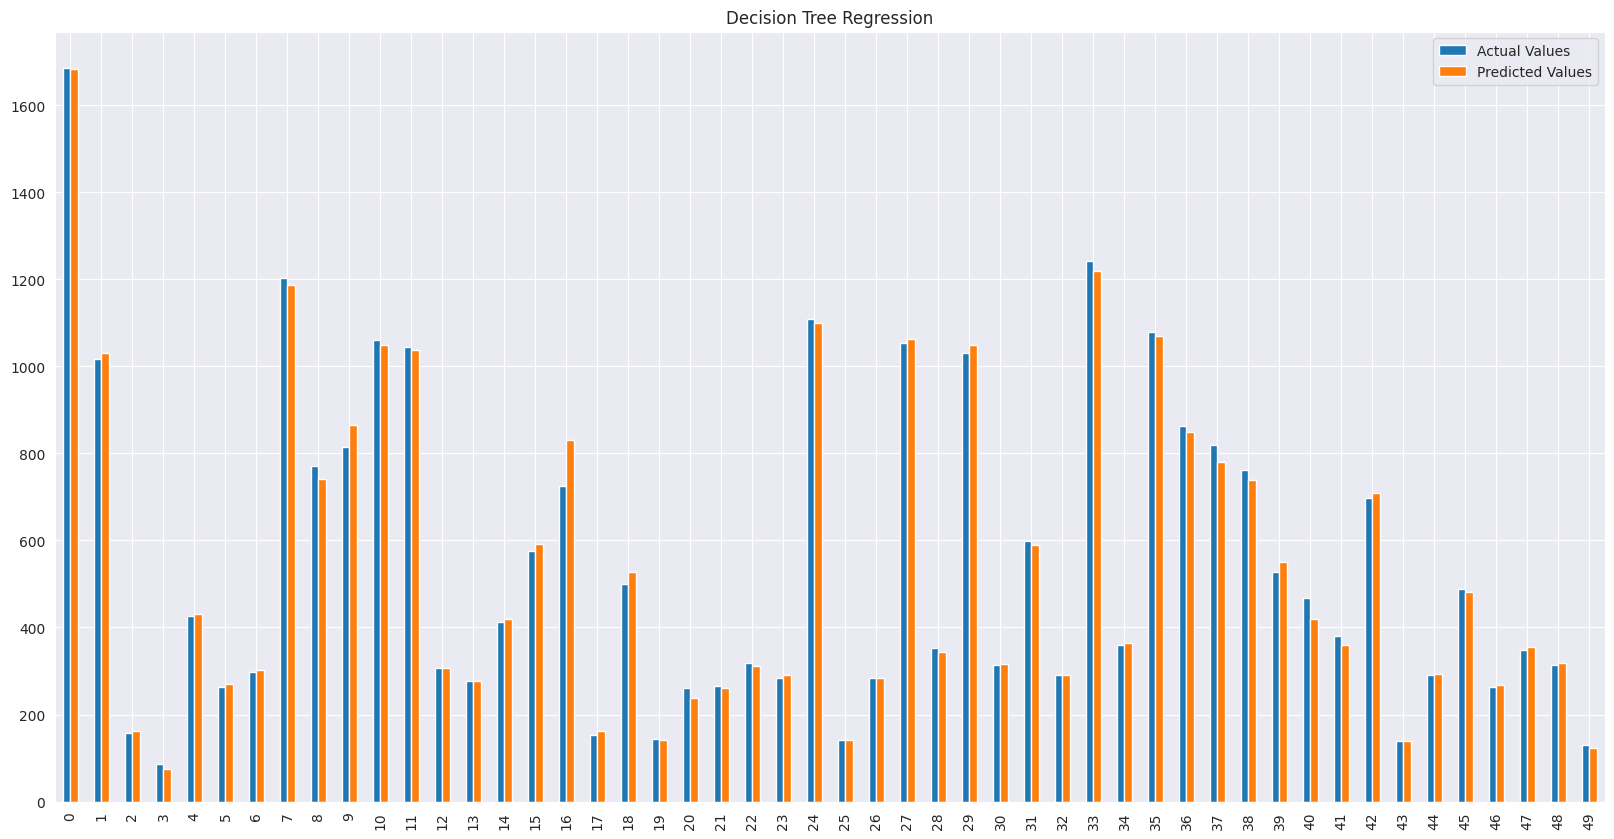

In [112]:
df3.head(50).plot(kind="bar", figsize=(20, 10), title='Decision Tree Regression')
plt.show()

In [113]:
accuracy3 = r2_score(y_test, predict3)
print("Accuracy of Decision Tree Regression:", accuracy3)

Accuracy of Decision Tree Regression: 0.9969119862656178


In [114]:
model4 = RandomForestRegressor(n_estimators=100)
build4 = model4.fit(X_train.reshape(-1, 1), y_train)
predict4 = model4.predict(X_test.reshape(-1, 1))

In [115]:
df4 = pd.DataFrame(list(zip(y_test, predict4)), columns=["Actual Values", "Predicted Values"])

In [116]:
df4.head().style.hide_index()

Actual Values,Predicted Values
1685.550000,1679.239000
1017.450000,1028.577842
157.800000,161.028850
85.350000,77.956458
425.350000,431.392507


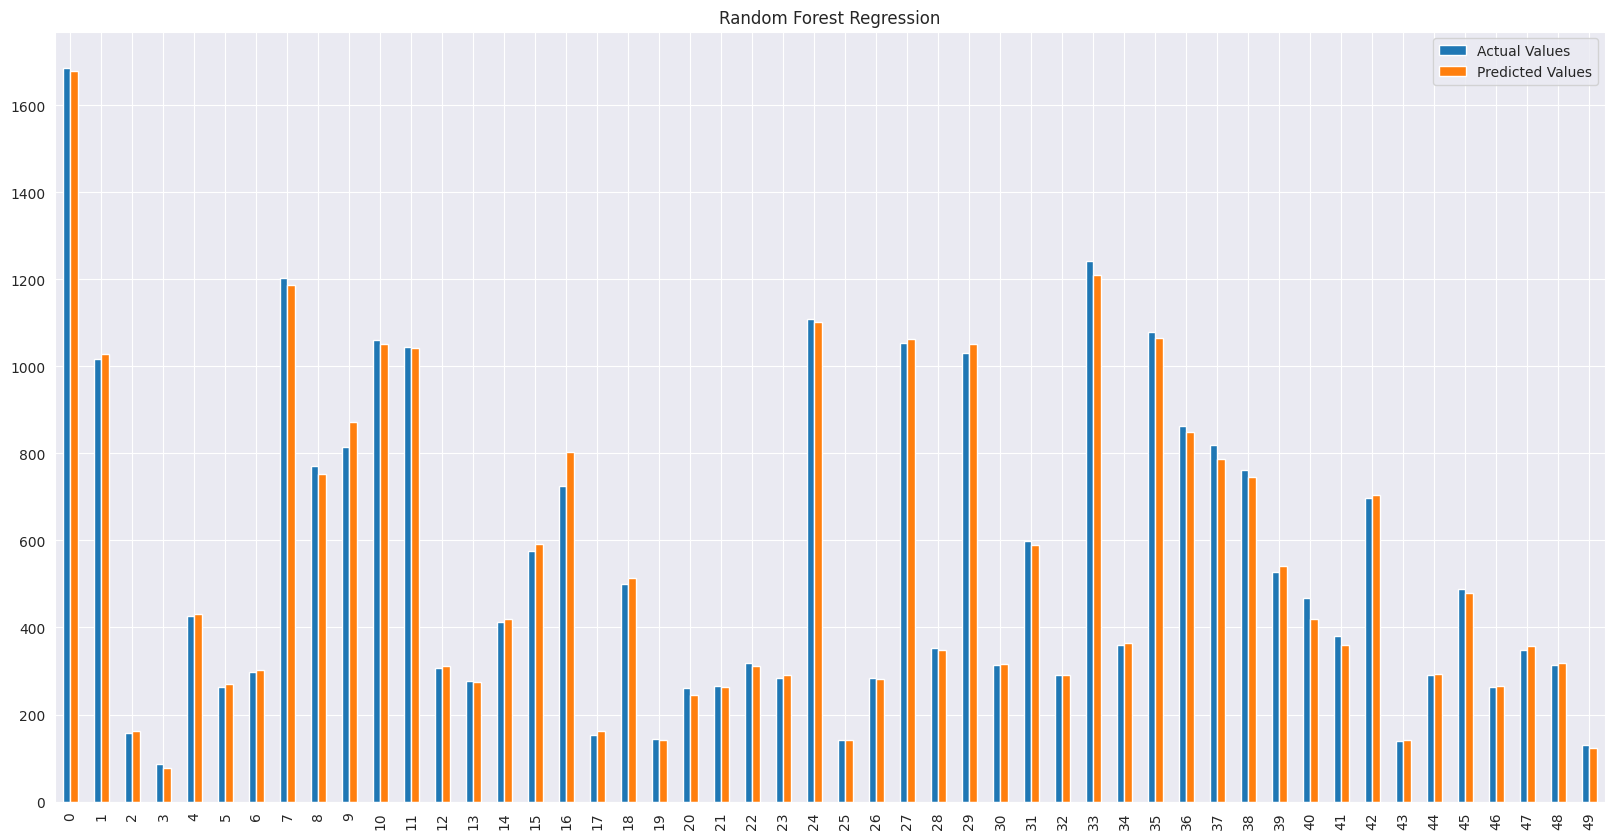

In [117]:
df4.head(50).plot(kind="bar", figsize=(20, 10), title='Random Forest Regression')
plt.show()

In [118]:
accuracy4 = r2_score(y_test, predict4)
print("Accuracy of Random Forest Regression:", accuracy4)

Accuracy of Random Forest Regression: 0.9976374233634027


In [119]:
dict1 = {
    "Model": ["Simple Linear Regression", "Support Vector Regression", "Decision Tree Regression", "Random Forest Regression"],
    "Accuracy": np.array([accuracy1, accuracy2, accuracy3, accuracy4])
}
df = pd.DataFrame(dict1)
display(df.style.hide_index())

Model,Accuracy
Simple Linear Regression,0.998421
Support Vector Regression,0.959972
Decision Tree Regression,0.996912
Random Forest Regression,0.997637


In [120]:
values = values.T

In [121]:
values = pd.DataFrame({
    "x": models,
    "y": acc
})

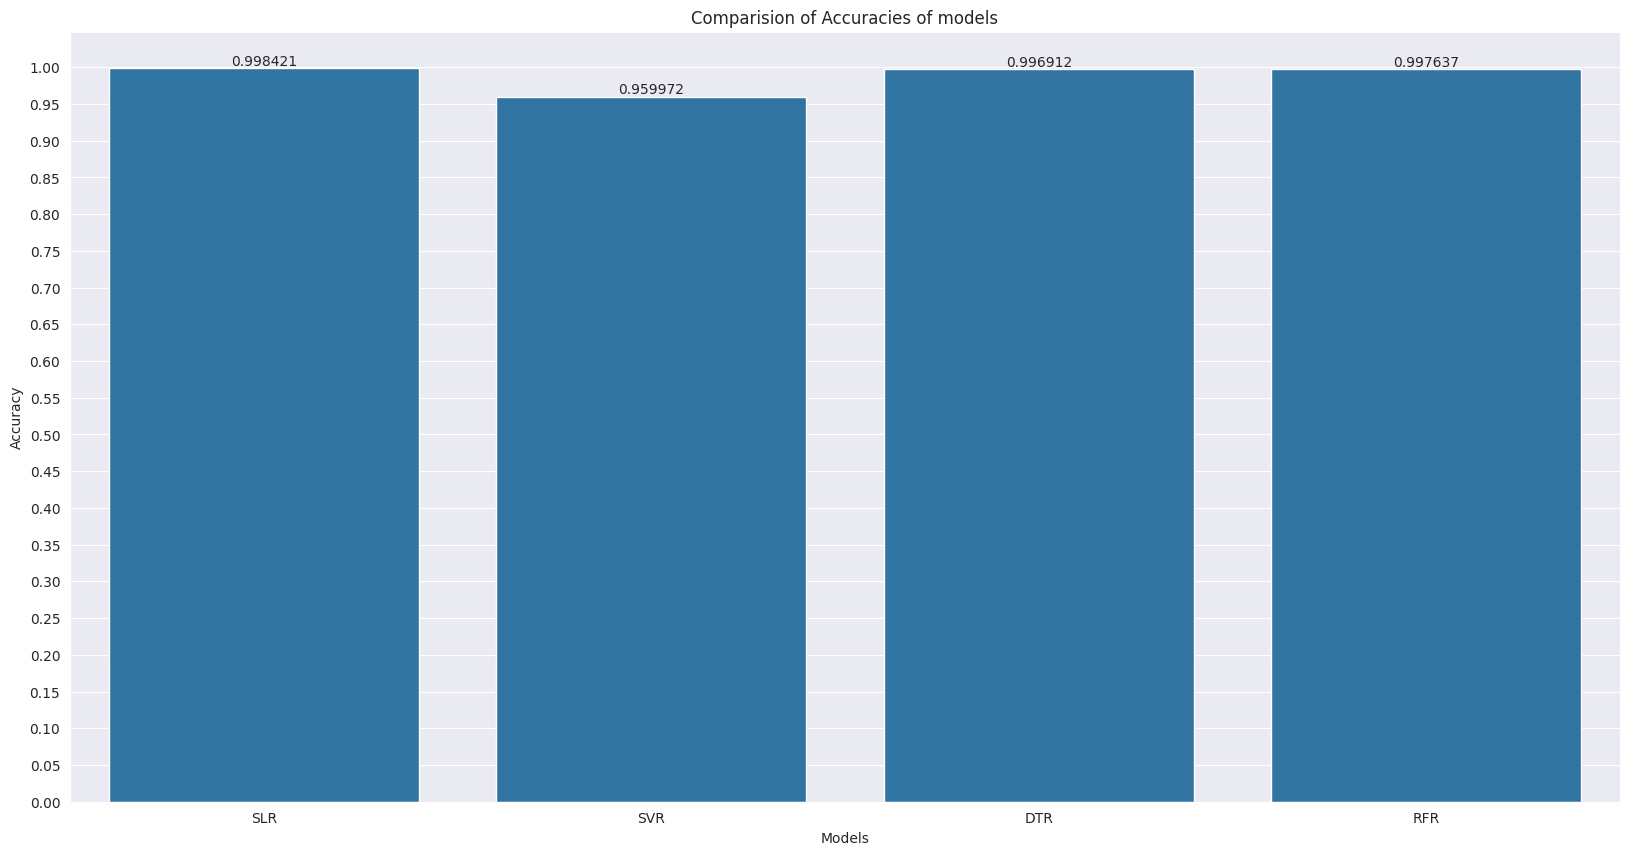

In [122]:
models = ['SLR', 'SVR', 'DTR', 'RFR']
acc = [accuracy1, accuracy2, accuracy3, accuracy4]
plt.figure(figsize=(20, 10))
plt.title('Comparision of Accuracies of models')
plt.yticks(np.linspace(0,1,21))
plt.ylabel("Accuracy")
plt.xlabel("Models")
plot = sns.barplot(x=models, y=acc, data=values, errwidth=0)
plot.bar_label(plot.containers[0])
plt.show()

In [123]:
new_dict = {
    'Date': np.array(['11-May-22']),
    'Open':np.array([718.00])}

future_stock_value = pd.DataFrame(new_dict)
display(future_stock_value.style.hide_index())

Date,Open
11-May-22,718.000000


In [124]:
models = np.array(df['Model'])
accuracy = np.array(df['Accuracy'])

In [125]:
highest_accuracy=0.0
best_model=""

In [126]:
for i in range(len(accuracy)) :
    if accuracy[i] >= highest_accuracy :
        highest_accuracy=accuracy[i]
        best_model=models[i]

In [127]:
slr, svr, dtr, rfr = [], [], [], []

if best_model == models[0] :
    future_stock_value['Predicted'] = model1.predict(future_stock_value.Open.values.reshape(-1, 1))
elif best_model == models[1] :
    future_stock_value['Predicted'] = model2.predict(future_stock_value.Open.values.reshape(-1, 1))
elif best_model == models[2] :
    future_stock_value['Predicted'] = model3.predict(future_stock_value.Open.values.reshape(-1, 1))
elif best_model == models[3] :
    future_stock_value['Predicted'] = model4.predict(future_stock_value.Open.values.reshape(-1, 1))

In [128]:
display(future_stock_value.style.hide_index())

Date,Open,Predicted
11-May-22,718.000000,717.512670
